# Installing the required dependencies

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

Added six different libraries
- Tensorflow
- Tensoflow-gpu
- openCV (Computer Vision library)
- mediapipe (allows to get keypoints from your face and head)
- sklearn
- matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Implement the keypoints and mediapipe holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing the utilities

In [3]:
# Defining the function to detect our image based on the model
def mediapipe_detection(image, model):
    # This line helps in the color conversion from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # This makes the image no longer writable.
    image.flags.writeable = False
    
    # helps make the prediction
    results = model.process(image)
    
    # Makes the image writable.
    image.flags.writeable = True
    
    # This converts the color again from RGB to BGR.
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    # Returns our image and results back to our loop.
    return image, results

In [24]:
# this function grabs the results and maps landmarks to the image.
def draw_landmarks(image,results):
    # Draws the points on the face
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    # Draws the points on the pose
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    # Draws the points on the Right Hand
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    # Draws the points on the left Hand
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [22]:
mp_holistic.FACEMESH_TESSELATION

frozenset({(18, 17),
           (82, 38),
           (8, 9),
           (456, 248),
           (167, 2),
           (303, 271),
           (69, 104),
           (253, 450),
           (41, 42),
           (315, 16),
           (73, 74),
           (339, 373),
           (258, 385),
           (105, 63),
           (219, 48),
           (304, 272),
           (236, 217),
           (231, 22),
           (85, 84),
           (365, 367),
           (237, 218),
           (243, 112),
           (436, 427),
           (409, 410),
           (248, 456),
           (330, 266),
           (136, 135),
           (88, 95),
           (394, 430),
           (107, 108),
           (118, 117),
           (439, 438),
           (442, 443),
           (260, 466),
           (115, 48),
           (342, 276),
           (121, 128),
           (200, 421),
           (113, 124),
           (132, 137),
           (23, 230),
           (343, 357),
           (443, 444),
           (62, 78),
           (26,

In [35]:
# writing a loop to do a video capture

cap = cv2.VideoCapture(0)

# Setting the mediapipe model while capturing image.
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened(): #opens the webcam

        #Reads the feed from the webcam
        ret, frame = cap.read()

        # Inserting the detection code below.
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw the landmarks to our live feed
        draw_landmarks(image, results)
        
        #shows the feed to the screen, pass the frame or image from webcam.
        cv2.imshow('OpenCV Feed', image)

        # Stops the video once we escape from the loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # After the break it will let go of our webcam.
    cap.release()
    # Deletes or closes the window.
    cv2.destroyAllWindows()

In [33]:
len(results.pose_world_landmarks.landmark)

33

In [28]:
draw_landmarks(frame, results)

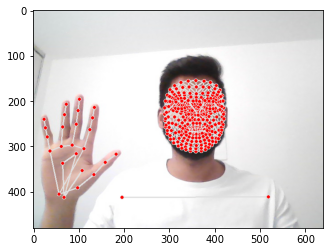

In [30]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))